## NLP Project Tested Models Simple RNN,LSTM,CNN,LogisticRegression and GradientBoostingClassifier

In [1]:
 # Importing  library 

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,save_model
from tensorflow.keras.layers import LSTM,Dense,Flatten,Conv1D,GlobalMaxPooling1D,SimpleRNN,Embedding,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# label 0 : Negative | 1 : Positive

epochs = 5
df=pd.read_csv("movie.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [4]:
df.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

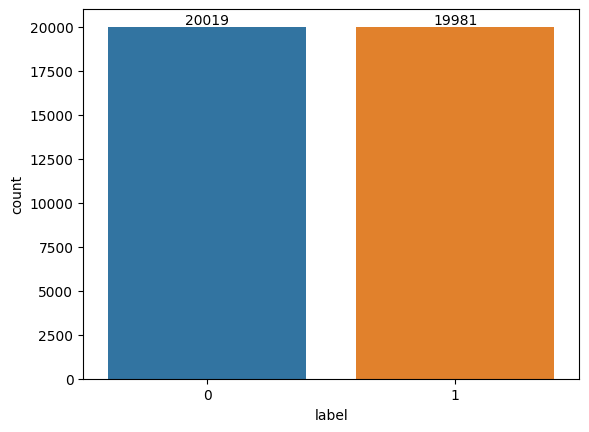

In [108]:
ax = sns.countplot(x='label',data=df)
for p in ax.containers:
    ax.bar_label(p)
plt.show()

## Spacy Language Model to Preprocess text

In [8]:
# Load spacy english language Model Large

nlp = spacy.load("en_core_web_lg")

In [9]:
# Function utilze Spacy Language Model to Preprocess text

def preprocess(text):
    
    # Process the text using spaCy, convert to lowercase, and remove stop words & Punct
    doc = nlp(text.lower())
    vectors = [token.vector for token in doc if not token.is_stop and not token.is_punct]
    sentence_vector = np.mean(vectors, axis=0) if vectors else None
    
    return sentence_vector

In [10]:
df['vector'] = df['text'].apply(preprocess)
df.head(3)

,text,label,vector
0,I grew up (b. 1965) watching and loving the Th...,0,"[-0.92349195, -0.27132046, -0.9221214, -1.0307..."
1,"When I put this movie in my DVD player, and sa...",0,"[-0.6370877, 0.46642402, -1.5766605, -1.291350..."
2,Why do people who do not know what a particula...,0,"[-0.19952859, 1.0327092, -2.105805, -0.8765191..."


In [11]:
# Split features and Target
feature = np.stack(df.vector.values)
target = df.label.values

In [12]:
# Training and Test data spliting 

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=42)
X_train.shape,X_test.shape

((32000, 300), (8000, 300))

In [13]:
# Build Logistic Regression Model & Traing

modelLr = LogisticRegression(max_iter=10000)
modelLr.fit(X_train, y_train)

# visualise Classification reports

y_pred = modelLr.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3966
           1       0.83      0.83      0.83      4034

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000



Text(70.72222222222221, 0.5, 'Truth')

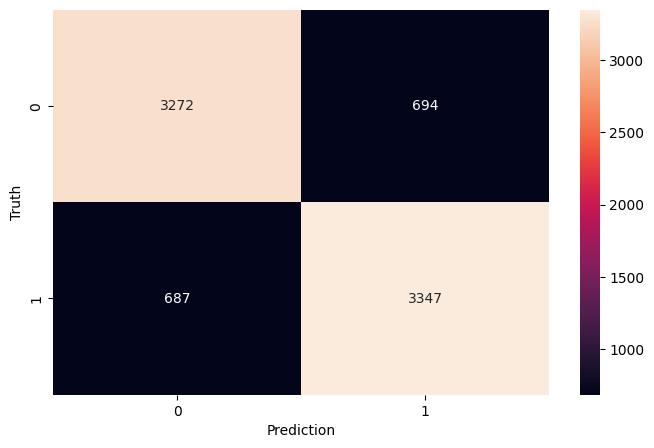

In [14]:
# visualise confusion matrix Logistic Regression
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3966
           1       0.82      0.81      0.81      4034

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000



Text(58.222222222222214, 0.5, 'Truth')

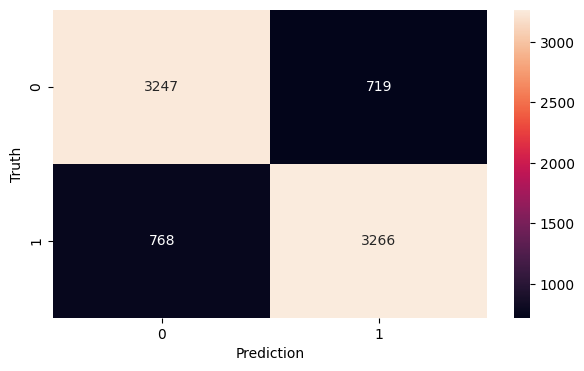

In [17]:
# Build GradientBoostingClassifier and traning

clf = GradientBoostingClassifier(n_estimators=500)
clf.fit(X_train, y_train)

# visualise Classification reports and confusion matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [20]:
y_test[:5],y_pred[:5]

(array([0, 1, 0, 1, 1], dtype=int64), array([0, 1, 1, 1, 1], dtype=int64))

## prepare training and test dataset For RNN

In [36]:
# Split features and Target For RNN
feature = df.text.values
target= df.label.values

In [37]:
# prepare training and test dataset

X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(feature, target, test_size=0.20, random_state=42)
X_train_R.shape,X_test_R.shape

((32000,), (8000,))

In [38]:
X_train_R[1]

"although i liked this Western,i do have to say,it's not one of my favourite John Ford Westerns.for me,it just lacks a certain something that most of his other films(the ones i have seen anyway)possess)i'm nit sure what that something is.it's not something tangible.anyway,the gist of the story is about a Mormon wagon train which is being used by a band of outlaws as a hideout from a pursuing posse.Ford employs a lot of his regulars here.there are some interesting characters,some nice scenery,a bit of action,and excitement.it all adds up to a watchable experience.it's certainly not boring.just not quite up to the usual John Ford standard.for me,Wagon Master is a 7/10"

In [39]:
# Tokenize Data

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_R)
sequences_train = tokenizer.texts_to_sequences(X_train_R)
sequences_test = tokenizer.texts_to_sequences(X_test_R)
vocab_size = len(tokenizer.word_index) + 1

X_train_R = pad_sequences(sequences_train, padding='post', maxlen=100)
X_test_R = pad_sequences(sequences_test, padding='post', maxlen=100)

In [40]:
X_train_R.shape,X_test_R.shape

((32000, 100), (8000, 100))

In [41]:
# Model building using Simple RNN and Training
batch_size = 64

modelRNN = Sequential()
modelRNN.add(Embedding(vocab_size, 100, input_length=100)) 
modelRNN.add(SimpleRNN(35))
modelRNN.add(Dense(20,activation='relu'))
modelRNN.add(Dropout(0.5)) 
modelRNN.add(Dense(1,activation='sigmoid'))
modelRNN.summary()
modelRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history1 = modelRNN.fit(X_train_R, y_train_R, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          10143700  
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 35)                4760      
                                                                 
 dense_8 (Dense)             (None, 20)                720       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,149,201
Trainable params: 10,149,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
400/400 [=======================

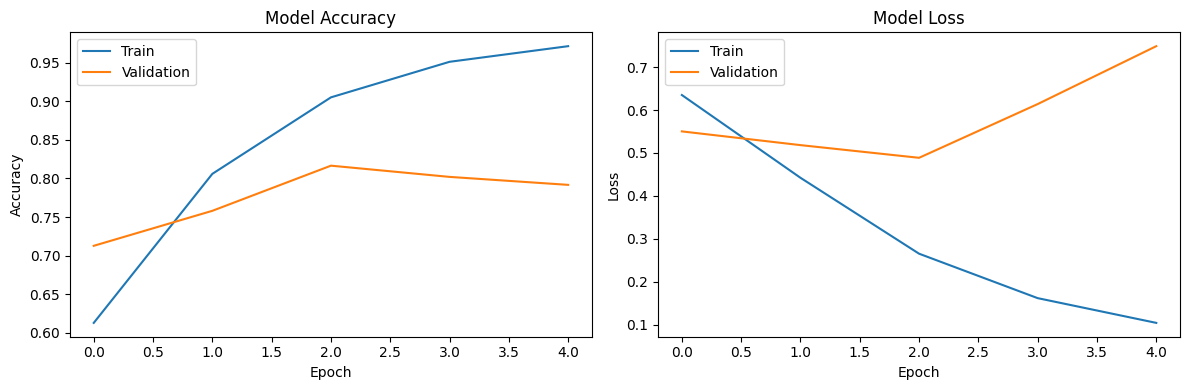

In [42]:
# Visualise Accuracy and Losses

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

250/250 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3966
           1       0.80      0.80      0.80      4034

    accuracy                           0.80      8000
   macro avg       0.80      0.80      0.80      8000
weighted avg       0.80      0.80      0.80      8000



Text(8.222222222222223, 0.5, 'Truth')

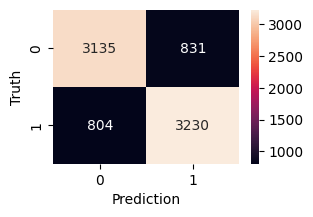

In [43]:
# visualise Classification reports and confusion matrix

y_pred = modelRNN.predict(X_test_R)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test_R, y_pred_binary))
cm = confusion_matrix(y_test_R, y_pred_binary)
plt.figure(figsize = (3,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [44]:
# Build LSTM Model and Training

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 100, input_length=100))
lstm_model.add(LSTM(35)) 
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dropout(0.5)) 
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = lstm_model.fit(X_train_R, y_train_R, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/5
400/400 [==============================] - 136s 326ms/step - loss: 0.4628 - acc: 0.7787 - val_loss: 0.3496 - val_acc: 0.8498
Epoch 2/5
400/400 [==============================] - 127s 317ms/step - loss: 0.2895 - acc: 0.8900 - val_loss: 0.3452 - val_acc: 0.8472
Epoch 3/5
400/400 [==============================] - 129s 323ms/step - loss: 0.2249 - acc: 0.9185 - val_loss: 0.3719 - val_acc: 0.8489
Epoch 4/5
400/400 [==============================] - 134s 335ms/step - loss: 0.1666 - acc: 0.9403 - val_loss: 0.4505 - val_acc: 0.8497
Epoch 5/5
400/400 [==============================] - 127s 318ms/step - loss: 0.1271 - acc: 0.9573 - val_loss: 0.5880 - val_acc: 0.8453


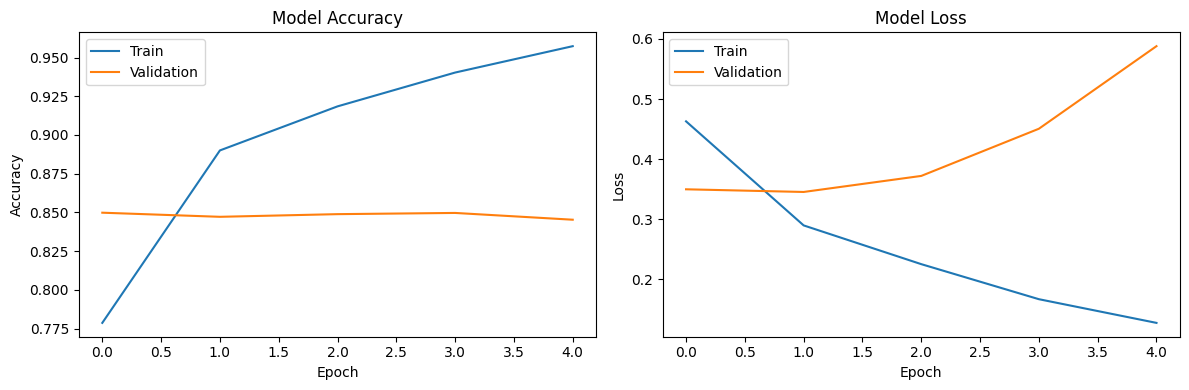

In [46]:
# Visualise Accuracy and Losses

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [47]:
lstm_model.save("lstm_model.h5")

250/250 [==============================] - 7s 25ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3966
           1       0.85      0.84      0.84      4034

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



Text(33.22222222222222, 0.5, 'Truth')

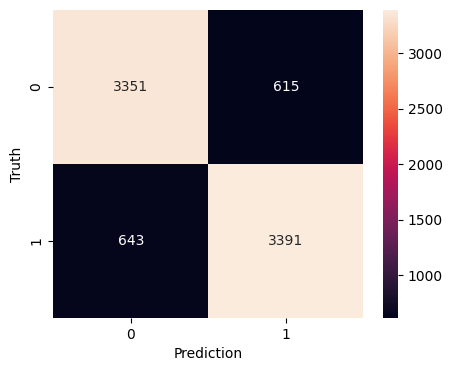

In [48]:
# visualise Classification reports and confusion matrix

y_pred = lstm_model.predict(X_test_R)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test_R, y_pred_binary))
cm = confusion_matrix(y_test_R, y_pred_binary)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [49]:
# Build CNN Model and traning

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size,output_dim=100, input_length=100))
cnn_model.add(Conv1D(30,3,activation='relu')) 
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(15,activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1,activation='sigmoid'))
cnn_model.summary()
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history3 = cnn_model.fit(X_train_R, y_train_R, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          10143700  
                                                                 
 conv1d (Conv1D)             (None, 98, 30)            9030      
                                                                 
 global_max_pooling1d (Globa  (None, 30)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten_1 (Flatten)         (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 15)                465       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                      

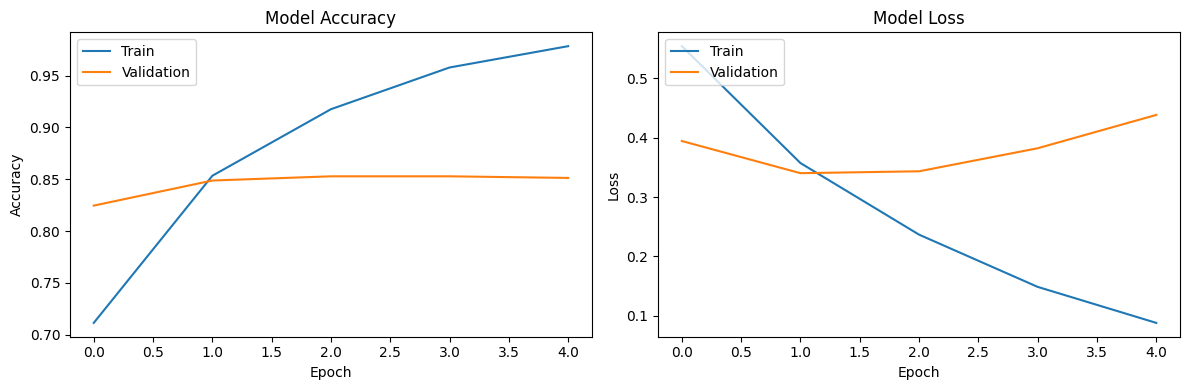

In [50]:
# Visualise Accuracy and Losses

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



In [51]:
cnn_model.save("cnn_model.h5")

250/250 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3966
           1       0.85      0.85      0.85      4034

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



Text(33.22222222222222, 0.5, 'Truth')

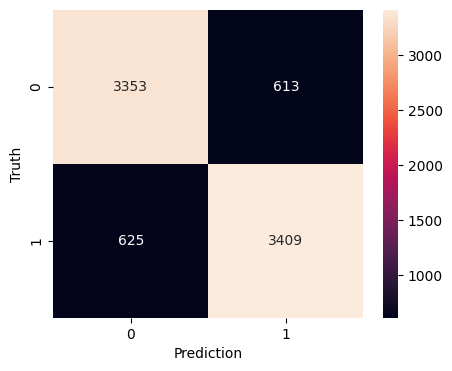

In [52]:
# visualise Classification reports and confusion matrix

y_pred = cnn_model.predict(X_test_R)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test_R, y_pred_binary))
cm = confusion_matrix(y_test_R, y_pred_binary)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## TextVectorization Method Bidirectional Model


In [53]:
# prepare training and test dataset for new model string form

X_train_sec, X_test_sec, y_train_sec, y_test_sec = train_test_split(feature, target, test_size=0.20, random_state=42)
X_train_sec.shape,X_test_sec.shape

((32000,), (8000,))

In [54]:
y_train_sec

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
# TextVectorization Method resources from https://www.geeksforgeeks.org/rnn-for-text-classifications-in-nlp/

encoder =tf.keras.layers.TextVectorization(max_tokens=10000,output_mode='int', output_sequence_length=100)
encoder.adapt(X_train_sec)
vocabulary = np.array(encoder.get_vocabulary())

original_text = df.text[0] 
encoded_text = encoder(original_text).numpy() 
decoded_text = ' '.join(vocabulary[encoded_text]) 
  
print('original: ', original_text) 
print('encoded: ', encoded_text) 
print('decoded: ', decoded_text)

original:  I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
encoded:  [  10 2072   58  898 8956  146    3 1805    2    1   32   54 5839   31
  373  280   72  249    1  155  3

In [58]:
# Bidirectional model with TextVectorization
epochs =5

modellstm2 = tf.keras.Sequential([ 
    encoder, 
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 100, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(18)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)  # Binary classification without activation for logits
])   
# Summary of the model 
modellstm2.summary() 
  
# Compile the model 
modellstm2.compile( 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding_9 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 40)          19360     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 36)               8496      
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 36)                0         
                                                      

In [60]:
history4 = modellstm2.fit(X_train_sec, y_train_sec,batch_size=batch_size,epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/5
400/400 [==============================] - 132s 293ms/step - loss: 0.3829 - accuracy: 0.8339 - val_loss: 0.3722 - val_accuracy: 0.8234
Epoch 2/5
400/400 [==============================] - 124s 309ms/step - loss: 0.3062 - accuracy: 0.8802 - val_loss: 0.4096 - val_accuracy: 0.8189
Epoch 3/5
400/400 [==============================] - 127s 318ms/step - loss: 0.2288 - accuracy: 0.9186 - val_loss: 0.4647 - val_accuracy: 0.8120
Epoch 4/5
400/400 [==============================] - 117s 291ms/step - loss: 0.1609 - accuracy: 0.9501 - val_loss: 0.5743 - val_accuracy: 0.8084
Epoch 5/5
400/400 [==============================] - 121s 302ms/step - loss: 0.1181 - accuracy: 0.9662 - val_loss: 0.7923 - val_accuracy: 0.8161


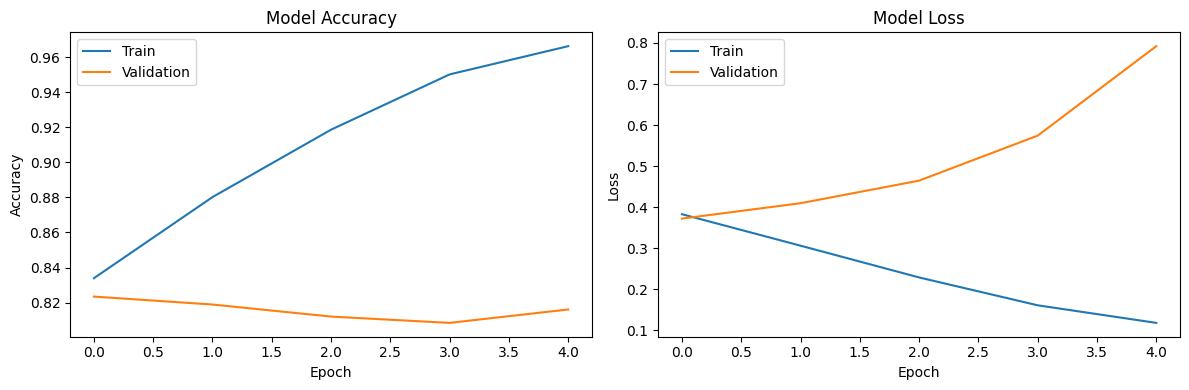

In [61]:
# Visualise Accuracy and Losses

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


250/250 [==============================] - 20s 48ms/step
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3966
           1       0.81      0.81      0.81      4034

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000



Text(33.22222222222222, 0.5, 'Truth')

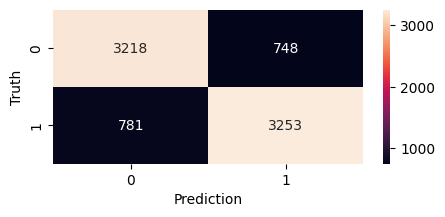

In [62]:
# visualise Classification reports and confusion matrix

y_pred = modellstm2.predict(X_test_sec)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test_sec, y_pred_binary))
cm = confusion_matrix(y_test_sec, y_pred_binary)
plt.figure(figsize = (5,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')